In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
df.shape

(100, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.isnull().sum()

,0
cgpa,0
iq,0
placement,0


In [ ]:
df.duplicated().sum()

np.int64(0)

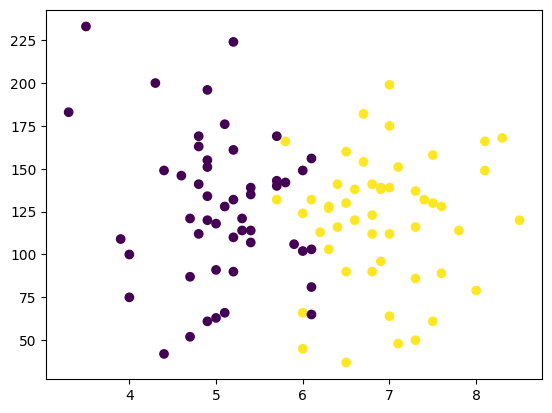

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[ 0.86511016,  1.95544554],
       [ 1.38765992,  0.17065808],
       [ 0.42965203,  0.97506933],
       [ 0.86511016,  1.35213711],
       [ 1.30056829, -1.51357797],
       [ 1.30056829,  0.92479363],
       [ 0.42965203, -0.78458028],
       [-0.52835587,  0.44717445],
       [ 1.12638504,  0.39689875],
       [-0.963814  ,  0.32148519],
       [-0.26708099,  0.27120949],
       [ 0.69092691, -0.78458028],
       [-0.6154475 , -0.18127184],
       [-0.78963075,  1.37727496],
       [-0.17998936,  0.522588  ],
       [ 0.60383528,  0.82424222],
       [-0.78963075, -1.38788872],
       [-0.87672238, -1.46330227],
       [ 1.82311805,  0.69855296],
       [-0.09289774, -0.38237465],
       [-1.39927214,  0.69855296],
       [-1.13799726, -1.73981864],
       [-0.52835587, -0.18127184],
       [-0.70253912,  2.58389183],
       [ 0.3425604 , -0.13099614],
       [-2.18309678,  2.8101325 ],
       [ 0.86511016,  0.44717445],
       [ 0.69092691,  0.04496882],
       [-0.78963075,

In [ ]:
x_test= scaler.transform(x_test)

In [ ]:
x_test

array([[-0.963814  , -0.03044473],
       [-0.17998936,  1.12589644],
       [ 0.25546877, -0.45778821],
       [ 0.08128552,  0.87451793],
       [-0.963814  ,  1.88003199],
       [-0.26708099,  0.54772585],
       [ 1.56184317, -0.18127184],
       [ 1.12638504, -0.13099614],
       [-1.48636376,  1.98058339],
       [-0.52835587,  0.34662304]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [ ]:
# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_test

,placement
22,0
85,1
98,1
8,0
80,0
6,0
55,1
72,1
95,0
49,0


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8

<Axes: >

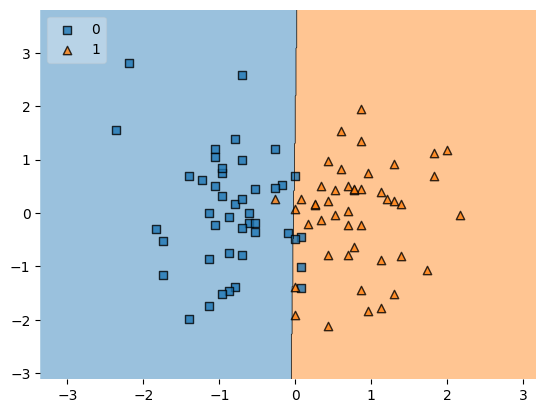

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))